In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
import tensorflow.keras as keras

import keras.backend as K

import matplotlib.pyplot as plt
import random

import librosa
import math

In [3]:
JSON_PATH="./Extracted_data.json"


In [4]:
def load_data_from_json(json_path):
    
    with open(json_path, "r") as f:
        data=json.load(f)
    
    
    X=data["mfcc"]
    Y=data["labels"]
    print("DATA IS LOADED SUCCESSFULLY")
    return np.array(X), np.array(Y),data["mapping"]

In [5]:
X,Y,music_genres = load_data_from_json(JSON_PATH)

DATA IS LOADED SUCCESSFULLY


In [6]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,shuffle=True, random_state=59,stratify=Y)

In [7]:

print(len(x_train),len(y_train),len(x_test),len(y_test))

6690 6690 3296 3296


In [8]:
X.shape,Y.shape 

((9986, 130, 13), (9986,))

In [9]:
X[0]

array([[-2.42435989e+02,  1.02184860e+02, -9.91323471e+00, ...,
        -3.95323563e+00, -2.40564466e+00, -2.38090611e+00],
       [-2.12989746e+02,  1.03544777e+02, -1.08341732e+01, ...,
        -5.81353188e+00,  2.64356732e+00, -2.80662107e+00],
       [-1.95409332e+02,  1.04360657e+02, -1.85501546e-01, ...,
        -1.08171635e+01, -5.88806152e-01, -5.28410530e+00],
       ...,
       [-1.24157700e+02,  6.37352219e+01,  2.11729393e+01, ...,
        -1.65676613e+01,  1.37965145e+01, -2.31835365e+01],
       [-1.11283928e+02,  6.05447235e+01,  1.33710301e+00, ...,
        -1.22842140e+01,  1.48256054e+01, -1.58052368e+01],
       [-1.31811951e+02,  6.65644531e+01, -7.93185902e+00, ...,
        -8.66252136e+00,  1.16732750e+01, -8.72385693e+00]])

In [10]:
Y[0]

0

SIMPLE ANN

In [13]:
ann_model=keras.models.Sequential([
    #input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10,activation="softmax")
])

In [14]:
optimiser=keras.optimizers.Adam(learning_rate=0.0001)
ann_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=optimiser,metrics=['accuracy'])

In [15]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [16]:
ann_history=ann_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 5s 7ms/step - loss: 15.5882 - accuracy: 0.1589 - val_loss: 2.2328 - val_accuracy: 0.2145
Epoch 2/100
210/210 [==============================] - 1s 6ms/step - loss: 3.9859 - accuracy: 0.1632 - val_loss: 2.2344 - val_accuracy: 0.1690
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 2.8061 - accuracy: 0.1393 - val_loss: 2.2890 - val_accuracy: 0.1144
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 2.5438 - accuracy: 0.1390 - val_loss: 2.2727 - val_accuracy: 0.1262
Epoch 5/100
210/210 [==============================] - 1s 6ms/step - loss: 2.4202 - accuracy: 0.1447 - val_loss: 2.2607 - val_accuracy: 0.1296
Epoch 6/100
210/210 [==============================] - 1s 6ms/step - loss: 2.3682 - accuracy: 0.1466 - val_loss: 2.2526 - val_accuracy: 0.1320
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 2.3098 - accuracy: 0.1593 - val_loss: 2.2209 - val_accuracy: 0.149

In [17]:
ann_model.save("ann_model.h5")

In [18]:
def plot_accuracy_error(history):
    fig,axis=plt.subplots(2)
    
    fig.set_size_inches(10,8)
    axis[0].plot(history.history["accuracy"],label="train_accuracy")
    axis[0].plot(history.history["val_accuracy"],label="val_accuracy")
    axis[0].set_ylabel("Accuracy")
    axis[0].legend(loc="lower right")
    axis[0].set_title("Accuracy eval")
   
   
   
    axis[1].plot(history.history["loss"],label="train_error")
    axis[1].plot(history.history["val_loss"],label="val_error")
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epoch")
    axis[1].legend(loc="upper right")
    axis[1].set_title("Error eval")
    
    plt.show()    
       

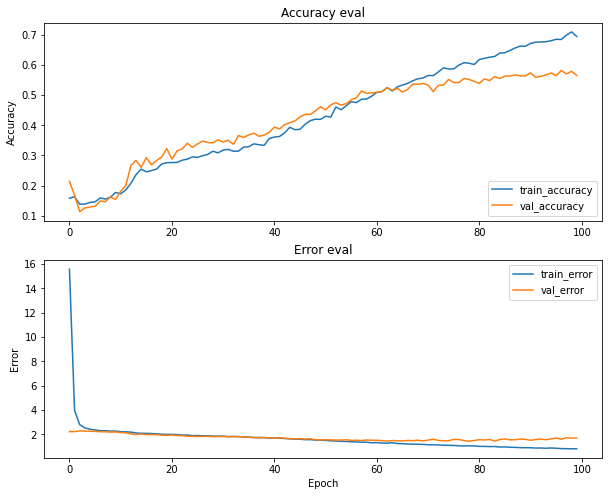

In [19]:
plot_accuracy_error(ann_history)

CREATING CNN MODEL

In [11]:
X=X.reshape(-1,X.shape[1],X.shape[2],1)
Y=Y.reshape(-1,1)

In [12]:
X.shape,Y.shape

((9986, 130, 13, 1), (9986, 1))

In [13]:
cnn_x_train,cnn_x_test_,cnn_y_train,cnn_y_test_ = train_test_split(X,Y,random_state=56,shuffle=True,stratify=Y,test_size=0.25)
cnn_x_val,cnn_x_test,cnn_y_val,cnn_y_test = train_test_split(cnn_x_test_,cnn_y_test_,random_state=89,shuffle=True,stratify=cnn_y_test_,test_size=0.2)

In [14]:
cnn_y_test_.shape,cnn_x_test_.shape

((2497, 1), (2497, 130, 13, 1))

In [15]:
X.shape[0],X.shape[1],X.shape[2] 

(9986, 130, 13)

In [16]:
keras.backend.set_image_data_format('channels_last')


In [17]:
input_shape=(X.shape[1],X.shape[2],1)
input_shape

(130, 13, 1)

In [29]:
def create_model():
    cnn_model=keras.models.Sequential()
    cnn_model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
    cnn_model.add(keras.layers.MaxPooling2D((2,4),strides=(2,2),padding="same",))
    cnn_model.add(keras.layers.BatchNormalization())
      
      
    cnn_model.add(keras.layers.Conv2D(128,(2,2),activation='relu'))
    cnn_model.add(keras.layers.MaxPooling2D((2,4),strides=(2,2),padding="same")),
    cnn_model.add(keras.layers.BatchNormalization())
   
    cnn_model.add(keras.layers.Dropout(0.4))
   
    cnn_model.add(keras.layers.Conv2D(64,(2,2),activation='relu'))
    cnn_model.add(keras.layers.MaxPooling2D((2,2),strides=(2,2),padding="same")),
    cnn_model.add(keras.layers.BatchNormalization())      
 
    
    cnn_model.add(keras.layers.Dropout(0.2))
                
    cnn_model.add( keras.layers.Flatten())
    cnn_model.add(keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))
    cnn_model.add(keras.layers.Dropout(0.5))
    cnn_model.add(keras.layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))
    cnn_model.add(keras.layers.Dropout(0.4))
    cnn_model.add(keras.layers.Dense(10,activation='softmax'))
      
    cnn_optimiser=keras.optimizers.Adam(learning_rate=0.0005)

    cnn_model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer=cnn_optimiser,metrics=['accuracy'])   
    return cnn_model
     

In [30]:
cnn_model=create_model()
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 11, 64)       640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 6, 64)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 64, 6, 64)        256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 5, 128)        32896     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 3, 128)       0         
 2D)                                                             
                                                      

In [31]:
cnn_history=cnn_model.fit(cnn_x_train,cnn_y_train,validation_data=(cnn_x_val,cnn_y_val),verbose=1,epochs=250,batch_size=32)

Epoch 1/250
235/235 [==============================] - 14s 15ms/step - loss: 29.2140 - accuracy: 0.3481 - val_loss: 4.3779 - val_accuracy: 0.4842
Epoch 2/250
235/235 [==============================] - 3s 12ms/step - loss: 2.4908 - accuracy: 0.4792 - val_loss: 1.7395 - val_accuracy: 0.5528
Epoch 3/250
235/235 [==============================] - 3s 12ms/step - loss: 1.7573 - accuracy: 0.5194 - val_loss: 1.6836 - val_accuracy: 0.5423
Epoch 4/250
235/235 [==============================] - 3s 12ms/step - loss: 1.6638 - accuracy: 0.5567 - val_loss: 1.5880 - val_accuracy: 0.6164
Epoch 5/250
235/235 [==============================] - 3s 12ms/step - loss: 1.6447 - accuracy: 0.5795 - val_loss: 1.6285 - val_accuracy: 0.5588
Epoch 6/250
235/235 [==============================] - 3s 12ms/step - loss: 1.6306 - accuracy: 0.5997 - val_loss: 1.6211 - val_accuracy: 0.5819
Epoch 7/250
235/235 [==============================] - 3s 12ms/step - loss: 1.6157 - accuracy: 0.6109 - val_loss: 1.5047 - val_accurac

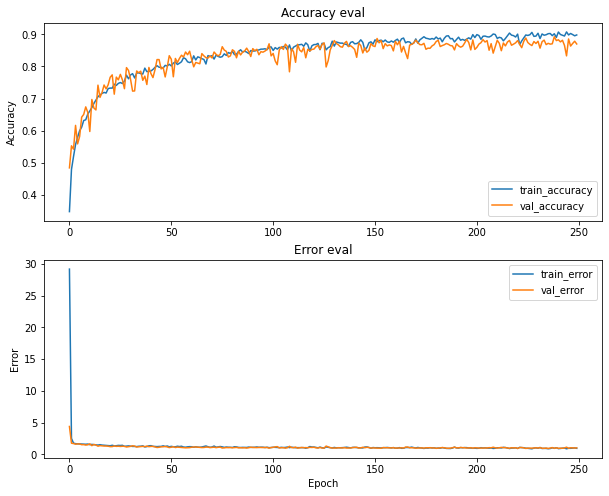

In [32]:
plot_accuracy_error(cnn_history)

In [44]:
cnn_model.save("cnn_model.h5")

In [18]:
X_predi=cnn_x_test[20]
Y_predi=cnn_y_test[20]
X_predi=X_predi.reshape(1,X_predi.shape[0],X_predi.shape[1],1)
X_predi.shape

(1, 130, 13, 1)

In [19]:
model=keras.models.load_model('cnn_model.h5')

In [20]:
prediction=model.predict(X_predi)

In [21]:
prediction.shape,Y_predi.shape

((1, 10), (1,))

In [22]:
predicted_index=np.argmax(prediction,axis=1)
print(prediction[0][predicted_index],predicted_index)

[0.97281015] [2]


In [23]:
Y_predi[0]

2


index :99
real Genre : hiphop
predicted Genre :hiphop


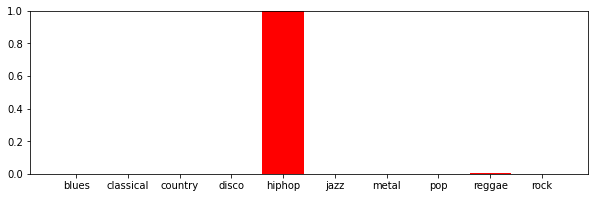


index :441
real Genre : pop
predicted Genre :pop


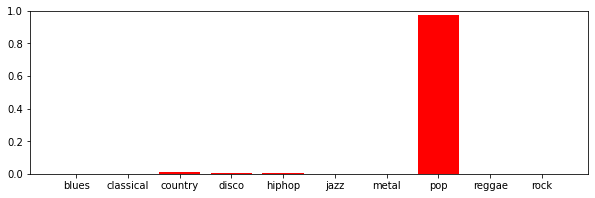


index :302
real Genre : rock
predicted Genre :rock


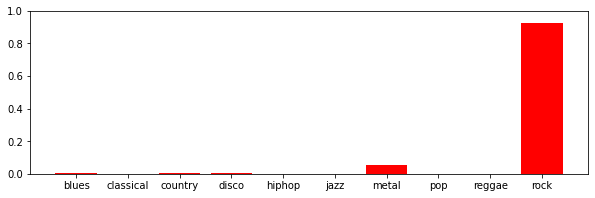


index :60
real Genre : classical
predicted Genre :classical


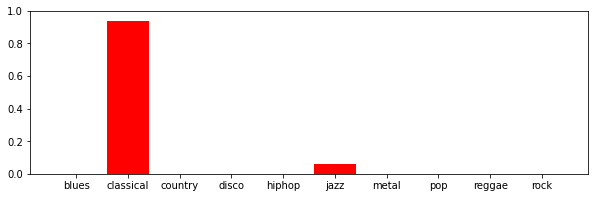


index :310
real Genre : metal
predicted Genre :metal


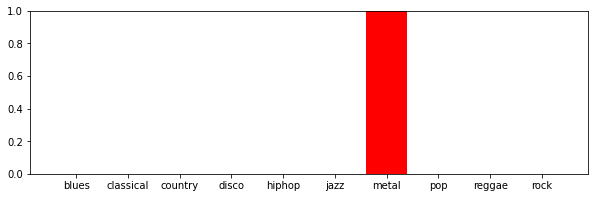


index :134
real Genre : classical
predicted Genre :classical


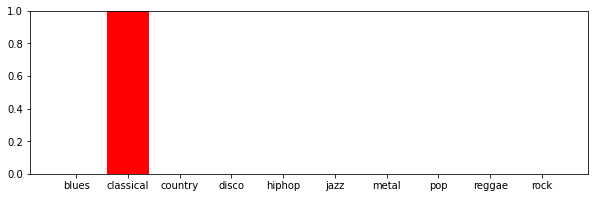


index :466
real Genre : pop
predicted Genre :pop


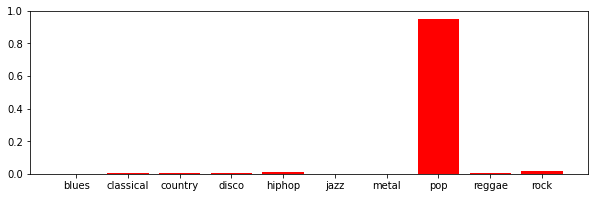


index :478
real Genre : pop
predicted Genre :pop


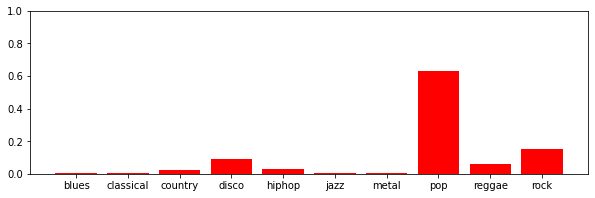


index :319
real Genre : pop
predicted Genre :pop


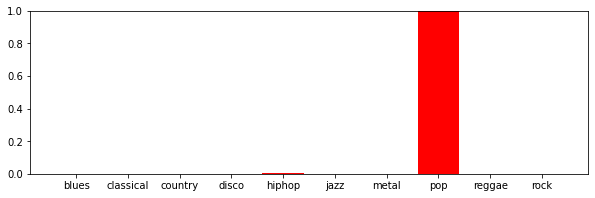


index :270
real Genre : pop
predicted Genre :disco


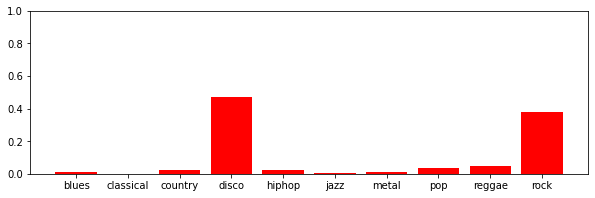


index :349
real Genre : blues
predicted Genre :blues


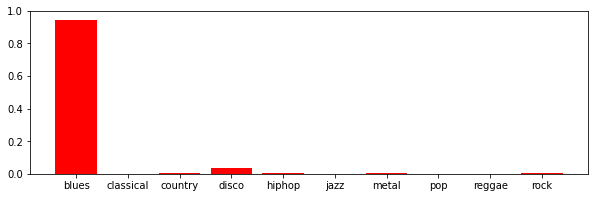


index :329
real Genre : country
predicted Genre :country


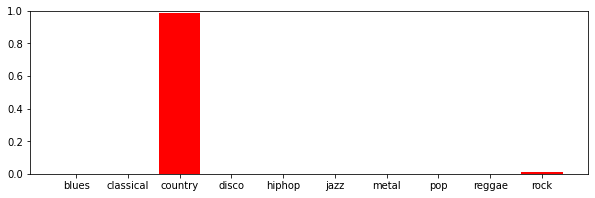


index :340
real Genre : disco
predicted Genre :disco


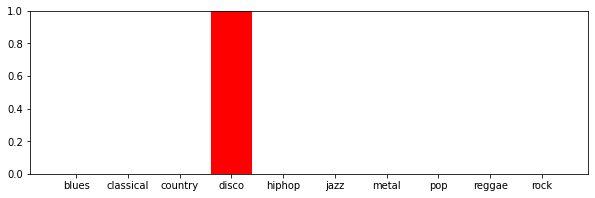


index :235
real Genre : jazz
predicted Genre :jazz


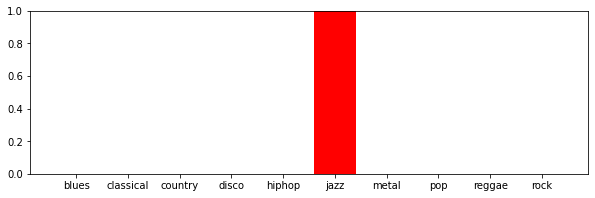


index :353
real Genre : jazz
predicted Genre :jazz


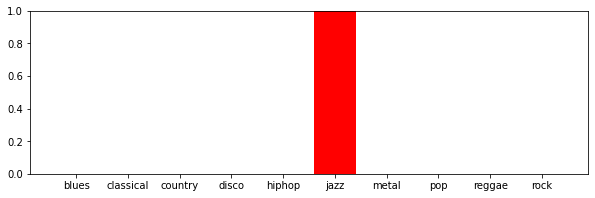


index :475
real Genre : pop
predicted Genre :pop


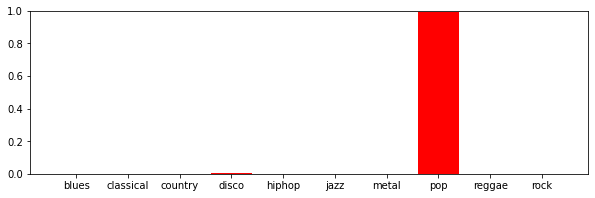


index :431
real Genre : hiphop
predicted Genre :hiphop


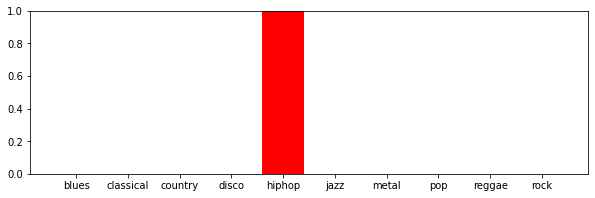


index :353
real Genre : jazz
predicted Genre :jazz


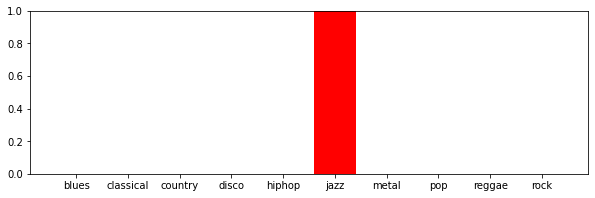


index :297
real Genre : country
predicted Genre :country


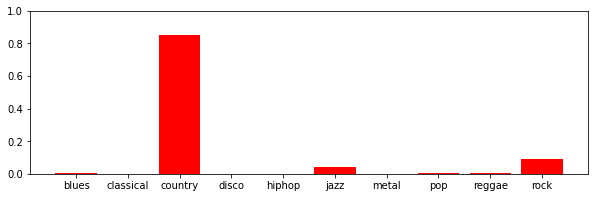


index :22
real Genre : disco
predicted Genre :disco


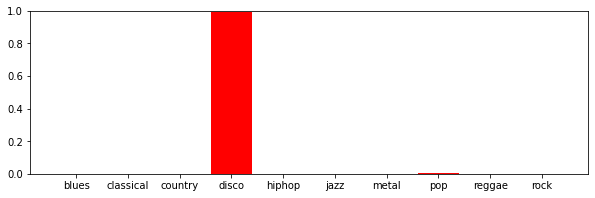


index :495
real Genre : metal
predicted Genre :metal


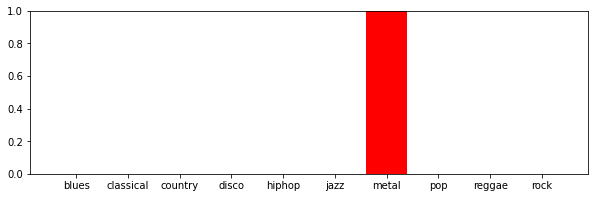


index :12
real Genre : pop
predicted Genre :pop


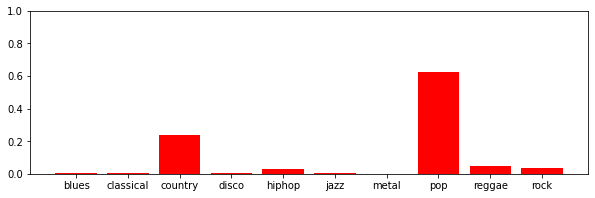


index :448
real Genre : hiphop
predicted Genre :hiphop


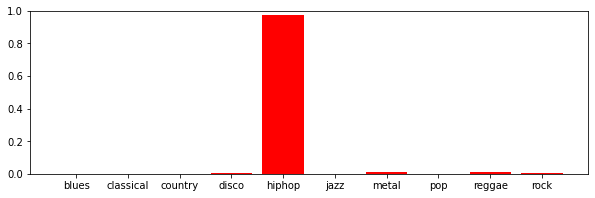


index :125
real Genre : pop
predicted Genre :pop


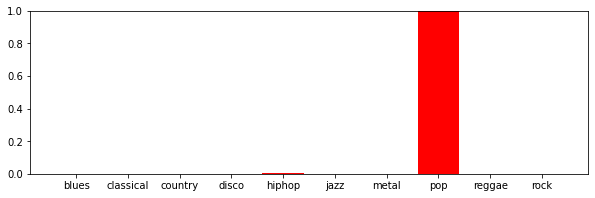


index :143
real Genre : jazz
predicted Genre :jazz


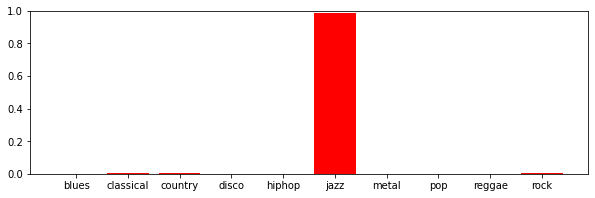


index :31
real Genre : pop
predicted Genre :pop


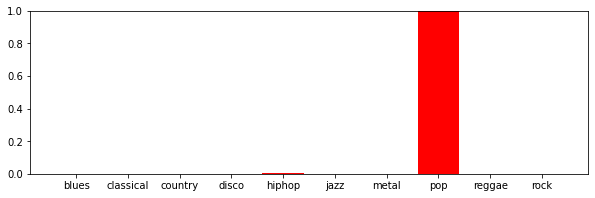


index :108
real Genre : hiphop
predicted Genre :hiphop


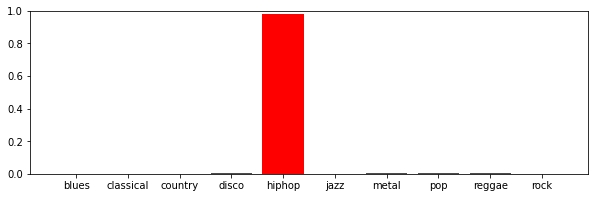


index :90
real Genre : jazz
predicted Genre :jazz


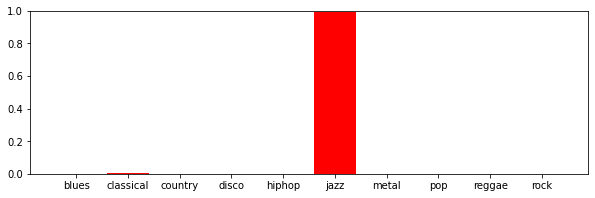


index :259
real Genre : blues
predicted Genre :blues


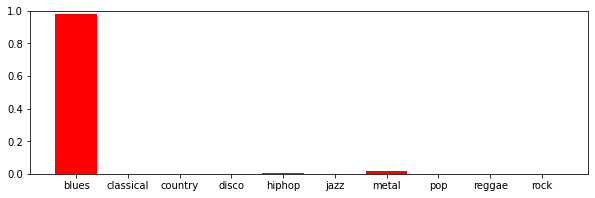


index :420
real Genre : country
predicted Genre :country


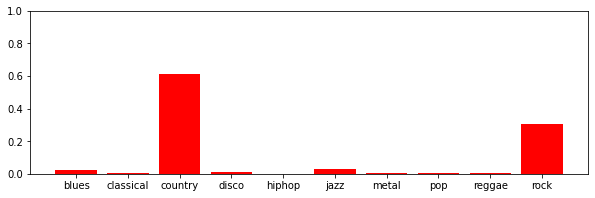

In [24]:
correct=0
wrong=0
for i in range(30):
  a=random.randint(0,len(cnn_x_test)-1)
  sample=cnn_x_test[a].reshape(1,cnn_x_test.shape[1],cnn_x_test.shape[2],1)
  print("\nindex :{}\nreal Genre : {}".format(a,music_genres[cnn_y_test[a][0]]))
  prediction=model.predict(sample)
  index=np.argmax(prediction,axis=1)
  print("predicted Genre :{}".format(music_genres[index[0]]))
  plt.figure(figsize=(10,3))
  plt.bar(music_genres,prediction[0],color="r")
  plt.ylim(0,1)
  plt.show()
  if cnn_y_test[a][0]==index[0]:
    correct+=1
  else:
    wrong+=1

In [25]:
correct,wrong

(29, 1)

In [26]:
result=model.evaluate(cnn_x_test,cnn_y_test)

16/16 [==============================] - 1s 26ms/step - loss: 0.9201 - accuracy: 0.8900


In [27]:
result

[0.92005854845047, 0.8899999856948853]